<a href="https://colab.research.google.com/github/shoumyasingh/Artificial_Intelligence_python/blob/main/Al_hw2_q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Given the following dataset, design python function as binary classifier for the following two classes. 
     - Plot all points in two different classes first in Excel or python matplotlib functions
     - Observe what boundary decision function is good to separate two classes
- Build up hypothesis function/loss function/cost function based on your selected   decision function
- Write python program to train your model
- After model training, plot decision boundary function in Excel or python matplotlib functions

In [5]:
# Required imports
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt

In [7]:
# hypothesis function
def hypothesis(x,theta):
    h = np.dot(x,theta)
    return sigmoid(h)

# sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))


In [8]:
# cost function
def cost(x,y,theta):
    m = x.shape[0]
    total_cost = (-1/m)*(np.sum((y*(np.log(hypothesis(x,theta))))+((1-y)*(np.log(1-hypothesis(x,theta))))))
    return total_cost

In [9]:
# gradient descent function
def gradient(x,y,theta):
    m = x.shape[0]
    return (1/m)*(np.dot(x.transpose(),(hypothesis(x,theta)-y)))

def gradient_descent(x,y,learning_rate,max_itr):
    m = x.shape[0]
    n = x.shape[1]
    
    # Add a column of ones to x-matrix (corresponding to bias term)
    ones = np.ones((m,1))
    x = np.hstack((ones,x))
    
    # Initialize parameters to zero
    theta = np.zeros((n+1,1))
    cost_history = []
    
    for i in range(max_itr):
        theta = theta - learning_rate*gradient(x,y,theta)
        cost_history.append(cost(x,y,theta))
        
    return theta,cost_history

In [33]:
# function to plot decision boundary
def plot_decision_boundary(x,y,theta):
    x_0 = data[data.Y==0].iloc[:,0:2]
    y_0 = data[data.Y==0].iloc[:,2]
    x_1 = data[data.Y==1].iloc[:,0:2]
    y_1 = data[data.Y==0].iloc[:,2]

    slope = -(theta[0] / theta[2])
    intercept = -(theta[1] / theta[2])
    x = np.arange(x.shape[0], step=1)
    y = slope * x + intercept
    plt.scatter(x_0.iloc[:, 0], x_0.iloc[:, 1], marker = 'x')
    plt.scatter(x_1.iloc[:, 0], x_1.iloc[:, 1], marker = 'o')
    plt.plot(x, y, '-b')
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.title('Plotting the data with decision boundary')
    plt.show()

       X1     X2  Y
0  -3.980 -0.120  1
1  -3.464 -2.110  1
2  -3.461  1.890  1
3  -2.220 -3.474  1
4  -2.020  0.030  0
5  -2.010  3.459  1
6  -1.420 -1.409  0
7  -1.416  1.419  0
8  -1.090  0.080  0
9  -0.190 -4.130  1
10  0.010  1.020  0
11  0.030 -2.120  0
12  0.040  2.060  0
13  0.060  3.970  1
14  0.070  0.100  0
15  0.120 -1.120  0
16  1.110  0.090  0
17  1.411  1.419  0
18  1.414 -1.415  0
19  1.860  3.470  1
20  1.960 -0.120  0
21  2.110 -3.472  1
22  3.461 -1.870  1
23  3.464  2.070  1
24  4.120  0.090  1
(25, 3)


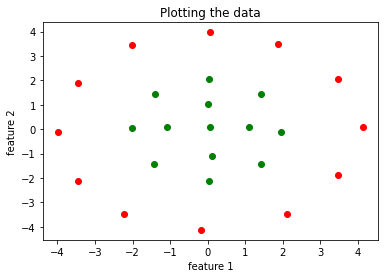

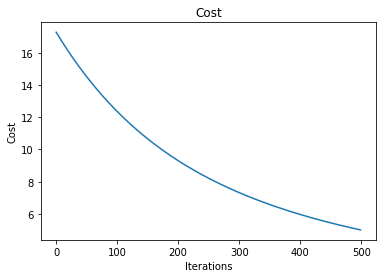

In [34]:
if __name__ == '__main__':

    # obtain the data in a dataframe format using 3 sets of lists x1, x2 and y
    x1 = [-3.98, -3.464,0-3.461,-2.22, -2.02, -2.01, -1.42, -1.416, -1.09, -0.19, 0.01, 0.03, 0.04, 0.06, 0.07, 0.12, 1.11, 1.411, 1.414, 1.86, 1.96, 2.11, 3.461, 3.464, 4.12]
    x2 = [-0.12, -2.11,  1.89, -3.474, 0.03, 3.459, -1.409, 1.419, 0.08, -4.13, 1.02, -2.12, 2.06, 3.97, 0.1, -1.12, 0.09, 1.419, -1.415, 3.47, -0.12, -3.472, -1.87, 2.07, 0.09]
    y = [1,1,1,1,0, 1, 0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1]
    data = pd.DataFrame({'X1':x1, 'X2':x2, 'Y':y})
    # observations
    print(data.head(25))
    # shape of the data
    print(data.shape)

    # Split data to dependendt and independent variables
    x = data.iloc[:,0:2]
    y = data.iloc[:,2]

    # Convert dependent variable into numpy array
    y = y.values

    # Convert independent variables into numpy array
    x = x.values
    

    # Plot all points in two different classes first using python matplotlib functions
    plt.scatter(x[y==0,0],x[y==0,1],c='g')
    plt.scatter(x[y==1,0],x[y==1,1],c='r')
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.title('Plotting the data')
    plt.show()

    # Define learning rate
    learning_rate = 0.01

    # Define maximum number of iterations
    max_itr = 500

    # Call gradient descent function
    theta,cost_history = gradient_descent(x,y,learning_rate,max_itr)

    # Plot cost history
    plt.plot(cost_history)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title("Cost")
    plt.show()



In [35]:
# Display trained parameters
print(theta)

[[ 1.50424889e+00  1.50424889e+00  1.50424889e+00  1.50424889e+00
  -1.50424889e+00  1.50424889e+00 -1.50424889e+00 -1.50424889e+00
  -1.50424889e+00  1.50424889e+00 -1.50424889e+00 -1.50424889e+00
  -1.50424889e+00  1.50424889e+00 -1.50424889e+00 -1.50424889e+00
  -1.50424889e+00 -1.50424889e+00 -1.50424889e+00  1.50424889e+00
  -1.50424889e+00  1.50424889e+00  1.50424889e+00  1.50424889e+00
   1.50424889e+00]
 [-2.91064030e-04 -2.91064030e-04 -2.91064030e-04 -2.91064030e-04
   2.91064030e-04 -2.91064030e-04  2.91064030e-04  2.91064030e-04
   2.91064030e-04 -2.91064030e-04  2.91064030e-04  2.91064030e-04
   2.91064030e-04 -2.91064030e-04  2.91064030e-04  2.91064030e-04
   2.91064030e-04  2.91064030e-04  2.91064030e-04 -2.91064030e-04
   2.91064030e-04 -2.91064030e-04 -2.91064030e-04 -2.91064030e-04
  -2.91064030e-04]
 [-2.14221192e-03 -2.14221192e-03 -2.14221192e-03 -2.14221192e-03
   2.14221192e-03 -2.14221192e-03  2.14221192e-03  2.14221192e-03
   2.14221192e-03 -2.14221192e-03  2.1

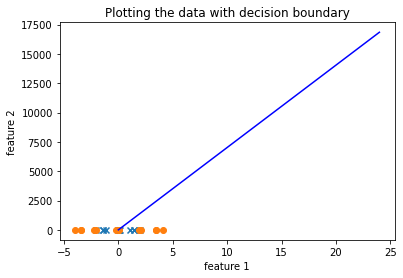

In [36]:
# Plot decision boundary
plot_decision_boundary(x,y,theta)